C:\Users\pgw6\Data 901 Fall 2019


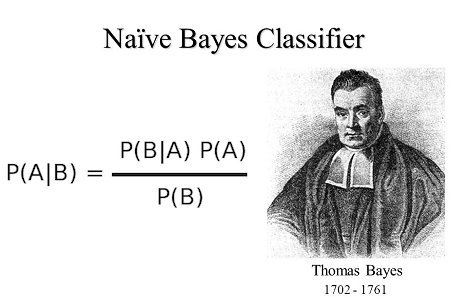

In [59]:
%cd "C:\\Users\\pgw6\\Data 901 Fall 2019"
from IPython.display import Image
Image(filename='nb2.png')

Python Resources:
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.predict_proba


### <font color = blue> Requirements:</font>

a) Classification Problem<br>
b) Categorical or Numerical Predictors<br>
c) Preeictors are assumed to be independent<br>
d) In case of Numerical predictors, an assumption on the distribution is needed (typically Gaussian) <br>
e) Python methods:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For Categorical predictors: MultinomialNB <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For Numerical predictors:  GaussianNB<br>
f) In case of mixed predictors, calculate Likelihood from both types, mulitple them and then 
    use threshold criteria to make prediction
    
    

In [41]:
# Importing dependencies
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


C:\Users\pgw6\Data 901 Fall 2019\allstate-claims-severity_Kaggle


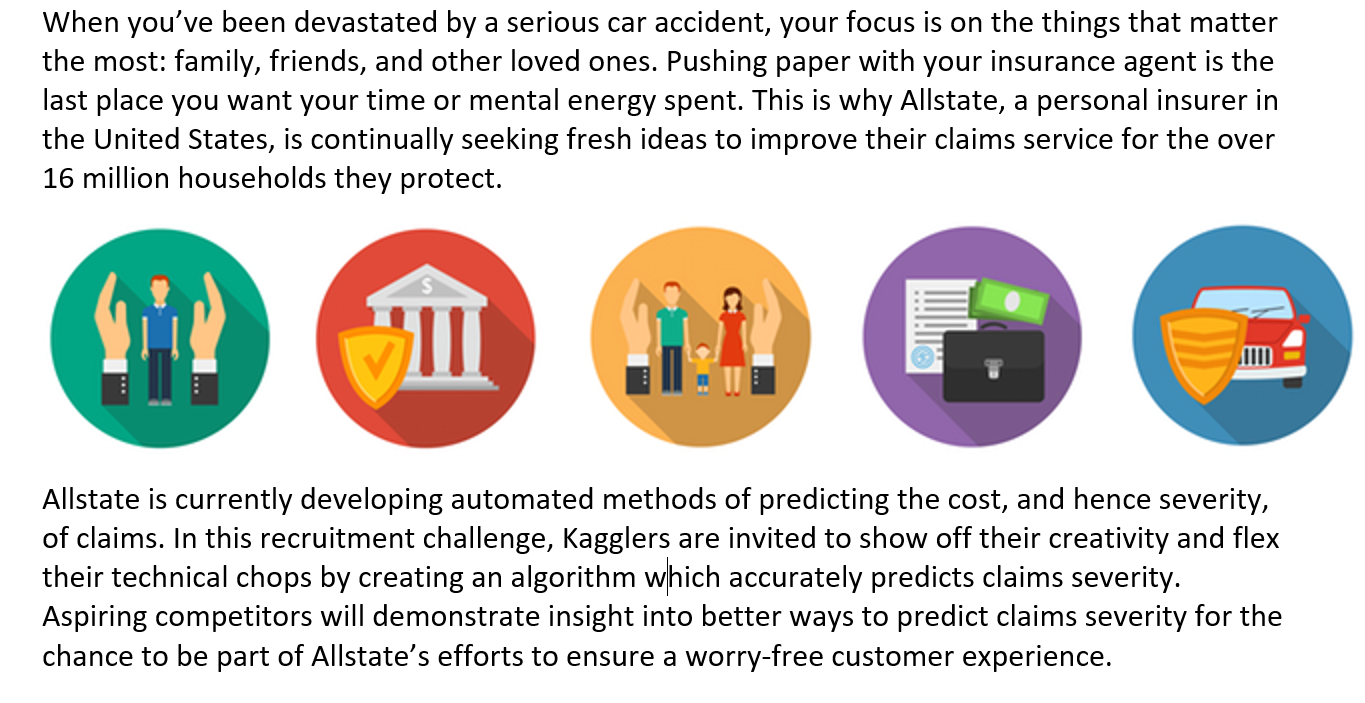

In [64]:
%cd "C:\\Users\\pgw6\\Data 901 Fall 2019\\allstate-claims-severity_Kaggle"
from IPython.display import Image
Image(filename='descr.png')

In [42]:
# Data folder
%cd "C:\\Users\\pgw6\\Data 901 Fall 2019\\allstate-claims-severity_Kaggle"

C:\Users\pgw6\Data 901 Fall 2019\allstate-claims-severity_Kaggle


In [44]:
# Reading csv file

allstate = pd.read_csv("allstate_sample.csv")
allstate.head()

,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,29023,91237,A,A,A,A,B,A,A,A,...,0.490651,0.992293,0.33372,0.42289,0.60401,0.797841,0.785706,0.189489,0.798932,1496.42
1,108716,339462,A,B,A,B,A,A,A,A,...,0.186254,0.317274,0.27797,0.32128,0.24355,0.180456,0.178698,0.304350,0.383475,3631.23
2,186837,582933,A,B,A,B,A,A,A,A,...,0.367193,0.266569,0.60087,0.58529,0.20496,0.254180,0.250169,0.509999,0.740503,1599.79
3,131854,411346,A,B,A,A,A,A,A,A,...,0.350956,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.236627,9270.33
4,28944,90991,A,B,A,A,A,A,A,A,...,0.763644,0.646277,0.25918,0.49790,0.61459,0.614915,0.601984,0.808455,0.221004,2790.16


In [4]:
# # Explore data here
# # print(list(allstate))

# for i,j in enumerate(list(allstate)):
#     if 80 <=i<=90:
#             print(i,j)
#             print(allstate[j].value_counts())
        

In [45]:
# Creating several versions of the categorical responses

allstate["BinLoss1"] = pd.cut(allstate['loss'], [0,2000,100000], labels = ["Low", "High"])
allstate["BinLoss2"] = pd.cut(allstate['loss'], [0,1500,100000], labels = ["Low", "High"])
allstate["BinLoss3"] = pd.cut(allstate['loss'], [0,1200,100000], labels = ["Low", "High"])
allstate["CatLoss"] = pd.cut(allstate['loss'], [0,1100,2200, 3500, 100000], labels = ["Low", "Low-Medium", "Medium", "High"])
allstate.head()



,Unnamed: 0,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont10,cont11,cont12,cont13,cont14,loss,BinLoss1,BinLoss2,BinLoss3,CatLoss
0,29023,91237,A,A,A,A,B,A,A,A,...,0.60401,0.797841,0.785706,0.189489,0.798932,1496.42,Low,Low,High,Low-Medium
1,108716,339462,A,B,A,B,A,A,A,A,...,0.24355,0.180456,0.178698,0.304350,0.383475,3631.23,High,High,High,High
2,186837,582933,A,B,A,B,A,A,A,A,...,0.20496,0.254180,0.250169,0.509999,0.740503,1599.79,Low,High,High,Low-Medium
3,131854,411346,A,B,A,A,A,A,A,A,...,0.39599,0.341813,0.352251,0.339244,0.236627,9270.33,High,High,High,High
4,28944,90991,A,B,A,A,A,A,A,A,...,0.61459,0.614915,0.601984,0.808455,0.221004,2790.16,High,High,High,Medium


In [47]:
# Distributions of the above variables

print(allstate["BinLoss1"].value_counts())

# pd.crosstab(allstate["BinLoss1"], allstate["BinLoss3"])

High    5414
Low     4943
Name: BinLoss1, dtype: int64


In [68]:
# Looking for missing values:

df = allstate.isnull().sum(axis = 0).to_frame(name = "count")

# Testing if there are missing values

df["colname"] = df.index
print(list(df[df["count"]>100].colname))


[]


### <font color = blue>Naive Bayes' classifier requires input data to be in the form of numpy array</font>
#### Categorical data need to be encoded using one-hot-encoding before use
#### Separate matrix of X features is required


In [52]:
# Response Matrix (a sample of features for chosen for illustration purposes only)
X = allstate.iloc[:,[2,3,4,5,6,80,83]]
X.head()
allstate.iloc[:,100:120].head()

,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2
0,D,N,A,A,C,H,H,E,D,H,BI,EG,A,E,AI,A,G,KL,0.467114,0.620805
1,P,L,G,A,A,C,E,K,H,B,K,EB,C,J,AE,A,L,CI,0.289618,0.358319
2,T,F,C,A,A,E,D,I,G,G,BI,EL,C,F,AX,A,P,BD,0.667647,0.358319
3,P,L,O,A,A,E,F,H,F,B,BI,BT,A,AH,AX,A,K,DP,0.497513,0.737068
4,T,O,D,A,A,G,E,F,L,K,BI,CL,A,AH,C,A,Q,FE,0.439813,0.620805


In [51]:
# allstate["cat116"].value_counts()

In [55]:
# One hot encoding of the categorical variables

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# 1. Initiate the encoder
encode = preprocessing.OneHotEncoder()

# 2. Fit the encoder
encode.fit(X)

# 3. Transform to binary columns
onehotlabels = encode.transform(X).toarray()
onehotlabels.shape


# what are fit and transform doing behind the scenes?

(10357, 18)

In [56]:
onehotlabels

<10357x18 sparse matrix of type '<class 'numpy.float64'>'
	with 72499 stored elements in Compressed Sparse Row format>

In [113]:
allstate["cat83"].value_counts()


B    7800
A    1443
D     861
C     253
Name: cat83, dtype: int64

In [117]:
# in case you wish to analyze what type of conversion took place

X_numpy = X.to_numpy()


combinedX = np.concatenate((X_numpy, onehotlabels), axis = 1)
combinedX[1000:1050]


array([['A', 'B', 'A', ..., 1.0, 0.0, 0.0],
       ['A', 'B', 'A', ..., 1.0, 0.0, 0.0],
       ['A', 'A', 'A', ..., 1.0, 0.0, 0.0],
       ...,
       ['B', 'B', 'A', ..., 1.0, 0.0, 0.0],
       ['B', 'A', 'A', ..., 0.0, 0.0, 1.0],
       ['B', 'B', 'A', ..., 1.0, 0.0, 0.0]], dtype=object)

In [57]:
# Calling the Multinomial Naive Bayes' classifier

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [58]:
# Fitting the classifier

clf.fit(onehotlabels,allstate["BinLoss1"] )

print(clf.predict(onehotlabels))

print("Number of mislabeled points out of a total %d points : %d"
      % (onehotlabels.shape[0],(allstate["BinLoss1"] != clf.predict(onehotlabels)).sum()))

pd.crosstab(allstate["BinLoss1"] , clf.predict(onehotlabels))

# Another way of calculating accuracy rate:
print("Overall Accuracy Rate = ", round(clf.score(onehotlabels, allstate["BinLoss1"] )*100), "%")


['Low' 'High' 'High' ... 'High' 'High' 'High']
Number of mislabeled points out of a total 10357 points : 3448
Overall Accuracy Rate =  67.0 %


In [65]:
# Predicted Probabilities and Score

# clf.predict(onehotlabels)
clf.predict_proba(onehotlabels)



array([[0.47273397, 0.52726603],
       [0.68511387, 0.31488613],
       [0.68511387, 0.31488613],
       ...,
       [0.68511387, 0.31488613],
       [0.88505064, 0.11494936],
       [0.99342059, 0.00657941]])

In [10]:
clf.fit(onehotlabels,allstate["CatLoss"] )

print(clf.predict(onehotlabels))

print("Number of mislabeled points out of a total %d points : %d"
      % (onehotlabels.shape[0],(allstate["CatLoss"] != clf.predict(onehotlabels)).sum()))

pd.crosstab(allstate["CatLoss"] , clf.predict(onehotlabels))

['Low-Medium' 'High' 'High' ... 'High' 'High' 'High']
Number of mislabeled points out of a total 10357 points : 5894


col_0,High,Low,Low-Medium,Medium
CatLoss,,,,
Low,444,357,1447,0
Low-Medium,903,193,2084,2
Medium,880,35,1056,4
High,2018,21,912,1


In [5]:
listofvars = list(allstate)
len(listofvars)

137

In [11]:
# ---------------------------------------------
# Selecting number of categorical columns
# ---------------------------------------------
num_cols = set(allstate._get_numeric_data().columns)
listofcat = [value for value in listofvars if value not in num_cols] 

# The following is the final list of categorical variables to be used in Naive Bayes;
finallist  = [var for var in listofcat if var not in  listofcat[-4:]]

In [42]:
# ---------------------------------------------
# random sampling without replacement
# ---------------------------------------------
vars = random.sample(finallist,10)
X = allstate.loc[:,vars]


In [11]:
# ---------------------------------------------
# One hot encoding of the categorical variables
# ---------------------------------------------

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# 1. Initiate the encoder
encode = preprocessing.OneHotEncoder()

# 2. Fit the encoder
encode.fit(X)

# 3. Transform to binary columns
onehotlabels = encode.transform(X).toarray()
onehotlabels.shape


(10357, 18)

In [12]:
# Calling the Multinomial Naive Bayes' classifier

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Fitting the classifier

clf.fit(onehotlabels,allstate["BinLoss1"] )

round(clf.score(onehotlabels, allstate["BinLoss1"]), 2)


0.67

In [67]:
mylist = [1,2,3,4,5,6,7]
random.sample(mylist, 7)

[6, 4, 3, 2, 1, 7, 5]

In [97]:
# ---------------------------------------------
# Dumping  the above in a for loop
# ---------------------------------------------

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
import time

print(time.ctime())

acc = []
cols = []
num = []

for i in range(5,30):
    for j in range(1,10):
        # random sampling without replacement
        vars = random.sample(finallist,i)
        X = allstate.loc[:,vars]
    #     print(vars)

        # 1. Initiate the encoder
        encode = preprocessing.OneHotEncoder()

        # 2. Fit the encoder
        encode.fit(X)

        # 3. Transform to binary columns
        onehotlabels = encode.transform(X).toarray()

        # 4. Calling the Multinomial Naive Bayes' classifier
        clf = MultinomialNB()

        # 5. Fitting the classifier

        clf.fit(onehotlabels,allstate["BinLoss1"] )
        acc.append(round(clf.score(onehotlabels, allstate["BinLoss1"]), 2))
        cols.append(','.join(vars))
        num.append(i)
df2 = pd.DataFrame()
df2["cols"] = cols
df2["acc"] = acc
df2["num"] = num

df2.shape
print(time.ctime())


Wed Sep 11 08:12:12 2019
Wed Sep 11 08:13:04 2019


In [101]:
# Improvement over the above
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB

print(time.ctime())

acc = []
cols = []
num = []

for k,i in enumerate(range(5,30)):
    if i < 10:
        for j in range(1,100):
            # random sampling without replacement
            vars = random.sample(finallist,i)
            X = allstate.loc[:,vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(X)
            onehotlabels = encode.transform(X).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabels,allstate["BinLoss1"] )
            acc.append(round(clf.score(onehotlabels, allstate["BinLoss1"]), 2))
            cols.append(','.join(vars))
            num.append(i)

    elif i < 20:
        for j in range(1,250):
            # random sampling without replacement
            vars = random.sample(finallist,i)
            X = allstate.loc[:,vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(X)
            onehotlabels = encode.transform(X).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabels,allstate["BinLoss1"] )
            acc.append(round(clf.score(onehotlabels, allstate["BinLoss1"]), 2))
            cols.append(','.join(vars))
            num.append(i)

    else:
        for j in range(1,600):
            # random sampling without replacement
            vars = random.sample(finallist,i)
            X = allstate.loc[:,vars]
            encode = preprocessing.OneHotEncoder()
            encode.fit(X)
            onehotlabels = encode.transform(X).toarray()
            clf = MultinomialNB()
            clf.fit(onehotlabels,allstate["BinLoss1"] )
            acc.append(round(clf.score(onehotlabels, allstate["BinLoss1"]), 2))
            cols.append(','.join(vars))
            num.append(i)
    if k%2==1:
        print(k, time.ctime())

df4 = pd.DataFrame()
df4["cols"] = cols
df4["acc"] = acc
df4["num"] = num

df4.to_csv("naivebayes3.csv")


Wed Sep 11 08:58:49 2019
1 Wed Sep 11 08:59:17 2019
3 Wed Sep 11 08:59:47 2019
5 Wed Sep 11 09:00:50 2019
7 Wed Sep 11 09:02:26 2019
9 Wed Sep 11 09:04:06 2019
11 Wed Sep 11 09:05:52 2019
13 Wed Sep 11 09:07:46 2019
15 Wed Sep 11 09:11:07 2019
17 Wed Sep 11 09:16:06 2019
19 Wed Sep 11 09:21:34 2019
21 Wed Sep 11 09:27:02 2019
23 Wed Sep 11 09:32:45 2019


In [70]:
nb_runs = pd.read_csv("naivebayes3.csv")
nb_runs.tail()
# nb_runs["num"].value_counts()
# nb_runs.shape

,Unnamed: 0,cols,acc,num
8970,8970,"cat110,cat8,cat27,cat104,cat45,cat51,cat46,cat...",0.66,29
8971,8971,"cat4,cat73,cat82,cat33,cat20,cat40,cat34,cat75...",0.69,29
8972,8972,"cat37,cat43,cat106,cat48,cat23,cat84,cat28,cat...",0.65,29
8973,8973,"cat35,cat108,cat63,cat83,cat76,cat20,cat109,ca...",0.66,29
8974,8974,"cat10,cat52,cat85,cat69,cat43,cat102,cat19,cat...",0.72,29


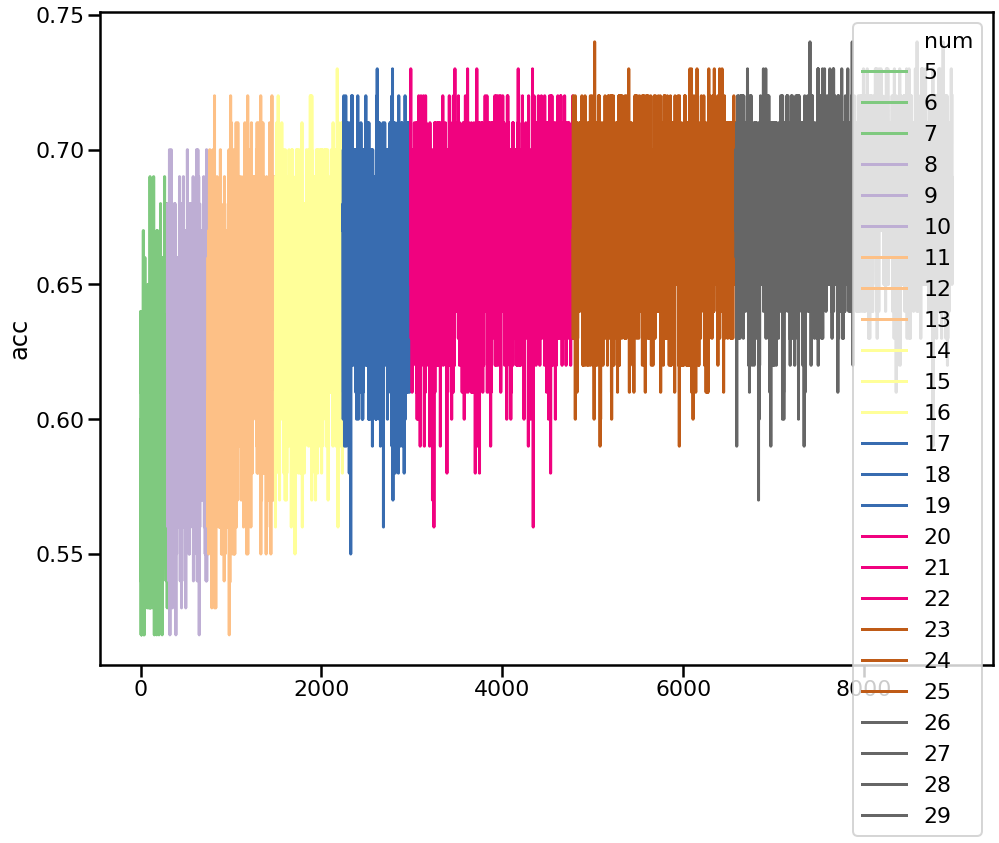

In [71]:
sns.set_context("poster")#paper, poster, talk
a4_dims = (16,12)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.lineplot(x=nb_runs.index, y="acc",hue="num", data=nb_runs, palette="Accent", legend = 'full')# brief, full or False
# plt.legend(title='Legend', loc='upper left', labels=['5','6','7','8'])


In [13]:
# for i in range(1,5):
#     if i < 4:
#         for j in range(1,3):
#             vars = random.sample(finallist,i)        
#             X = allstate.loc[:,vars]
#             print(vars)
#     else:
#         for j in range(5,10):
#             vars = random.sample(finallist,i)        
#             X = allstate.loc[:,vars]
#             print(vars)

    